### Plan
1. Test custom models on self-prepared data.
2. Process external data.
3. Compare custom models performance with existing ones on external data.
---

## 1. Test custom models on self-prepared data.

### Imports

In [1]:
import pandas as pd
from algorithms.ml.classifiers.OneRuleClassifier import OneRuleClassifier
from algorithms.ml.classifiers.NaiveBayesClassifier import NaiveBayesClassifier
from algorithms.ml.classifiers.DecisionTreeClassifier import DecisionTreeClassifier
from algorithms.ml.classifiers.KNNClassifier import KNNClassifier

### Data preparation

In [3]:
data = [
        (0, 0, 1, 0, 0),
        (1, 0, 0, 1, 1),
        (2, 0, 1, 0, 1),
        (0, 1, 0, 0, 1),
        (0, 1, 1, 0, 1),
        (0, 1, 1, 1, 0),
        (1, 0, 0, 1, 0),
        (2, 0, 0, 0, 1),
        (2, 1, 1, 0, 1),
        (0, 1, 1, 1, 0)
    ]

# Creating DataFrame with specified column names
df = pd.DataFrame(data, columns=['Q1', 'Q2', 'Q3', 'Q4', 'S'])

In [4]:
X = df.drop(["S"], axis=1)
y = df["S"]

In [5]:
X_inf = pd.DataFrame([(2, 1, 1, 1)],columns=['Q1', 'Q2', 'Q3', 'Q4'])

### Modeling

In [11]:
df = pd.DataFrame()
models = [OneRuleClassifier(), NaiveBayesClassifier(), DecisionTreeClassifier(), KNNClassifier()]
for model in models:
    model.fit(X, y)
    y_pred = model.predict(X_inf)
    df_ = X_inf.copy()
    df_["prediction"] = y_pred
    df = pd.concat([df, df_], ignore_index=True)

names = ["OneRuleClassifier", "NaiveBayesClassifier", "DecisionTreeClassifier", "KNNClassifier"]
df["Name"] = names

In [15]:
df[["Name", "Q1", "Q2", "Q3", "Q4", "prediction"]]

,Name,Q1,Q2,Q3,Q4,prediction
0,OneRuleClassifier,2,1,1,1,0
1,NaiveBayesClassifier,2,1,1,1,1
2,DecisionTreeClassifier,2,1,1,1,1
3,KNNClassifier,2,1,1,1,1


## 2. Process external data.

### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from mlxtend.classifier import OneRClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNeighborsClassifier

from algorithms.ml.classifiers.OneRuleClassifier import OneRuleClassifier as OneRuleClassifier_custom
from algorithms.ml.classifiers.NaiveBayesClassifier import NaiveBayesClassifier as NaiveBayesClassifier_custom
from algorithms.ml.classifiers.DecisionTreeClassifier import DecisionTreeClassifier as DecisionTreeClassifier_custom
from algorithms.ml.classifiers.KNNClassifier import KNNClassifier as KNNClassifier_custom

### Load data

In [22]:
data = pd.read_csv('./telecom_churn.csv')

*Цей датасет присвячений даним деякого телефонного оператора. Датасет складається з 3333 унікальних записів, та має 21 колонку, і розглядає проблему відтоку клієнтів телефонного оператора.*

state - Буквений код штату.

account_length - Як довго клієнт обслуговується компанію.

area code - Префікс номеру телефона.

phone number - Номер телефону.

international plan - Міжнародний роумінг (підключений / не підключений).

voice mail plan - Голосова пошта (підключена / не підключена).

number vmail messages - Кількість голосових повідомлень.

total day minutes - Загальна тривалість розмов удень.

total day calls - Загальна кількість дзвінків удень.

total day charge - Загальна сума оплати за послуги удень.

total eve minutes - Загальна тривалість розмов увечері.

total eve calls - Загальна кількість дзвінків увечері.

total eve charge - Загальна сума оплати за послуги увечері.

total night minutes - Загальна тривалість розмов уночі.

total night calls - Загальна кількість дзвінків уночі.

total night charge - Загальна сума оплати за послуги уночі.

total intl minutes - Загальна тривалість міжнародних розмов.

total intl calls - Загальна кількість міжнародних розмов.

total intl charge - Загальна сума оплати за міжнародні розмови.

customer service calls - Кількість звернень до сервісного центру.

churn - Ознака відтоку клієнтів, бінарна змінна (True – втрата клієнта, тобто відтік).

### Data overview

In [30]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [32]:
print(f"Null values:\n--------\n{data.isnull().sum()}")

Null values:
--------
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [33]:
print(f"Unique values:\n--------\n{data.nunique()}")

Unique values:
--------
state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


### Pre-process data

In [23]:
df = data.copy()

df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['state'] = pd.factorize(df['state'])[0]
df['churn'] = df['churn'].astype('int')

df.drop(['phone number'], axis=1, inplace=True)

### EDA

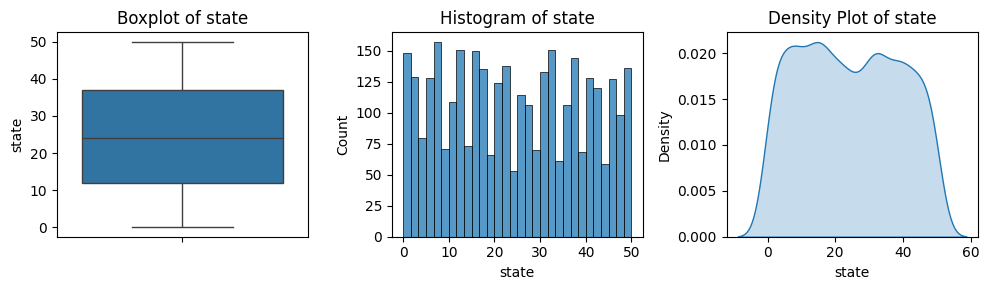

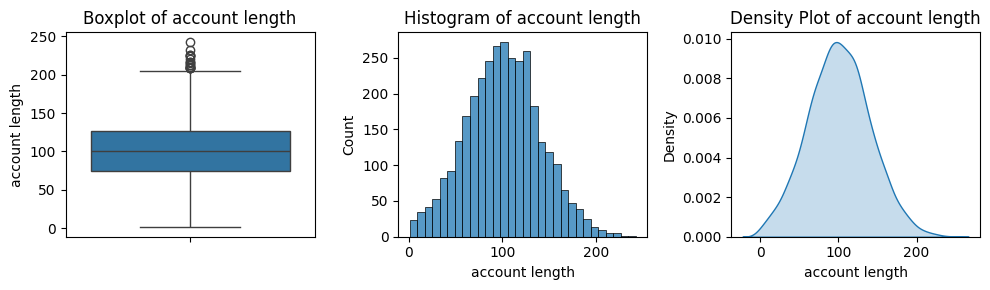

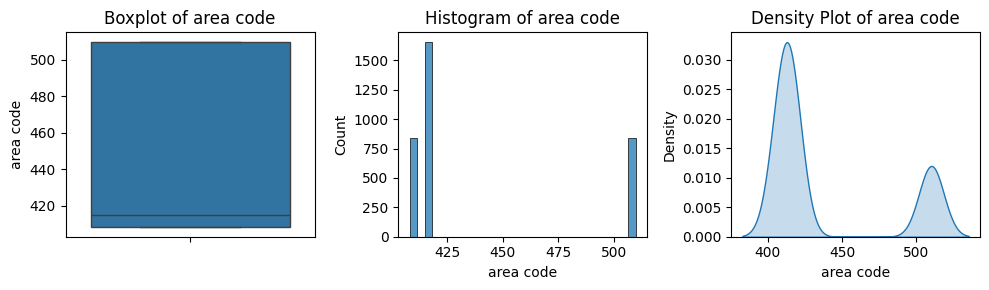

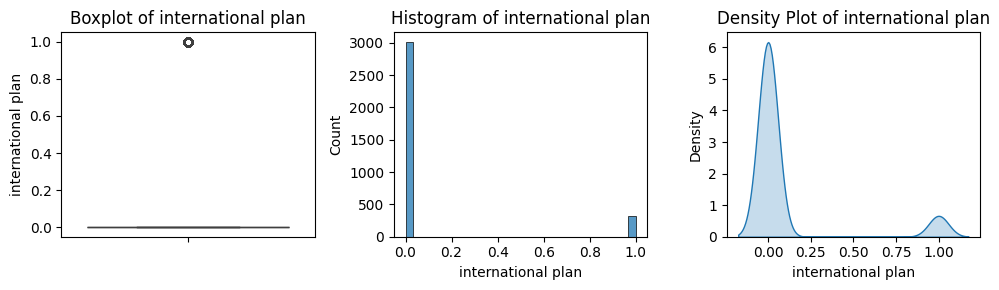

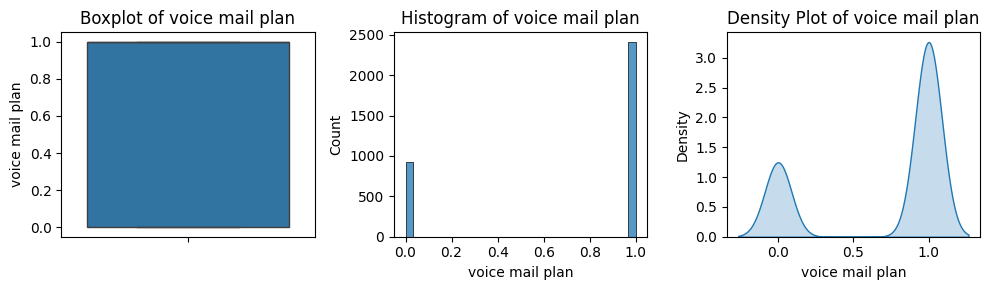

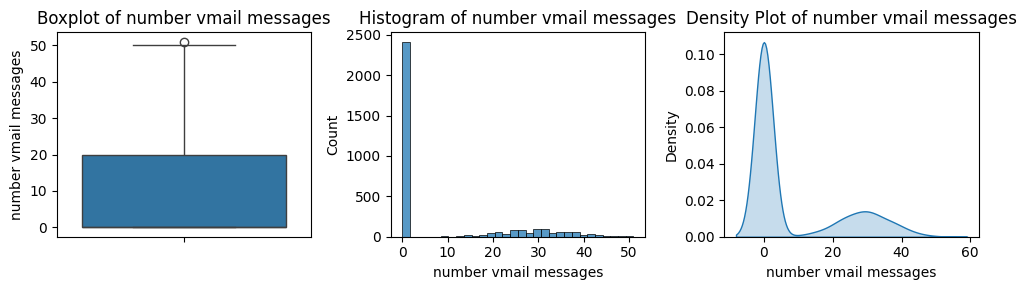

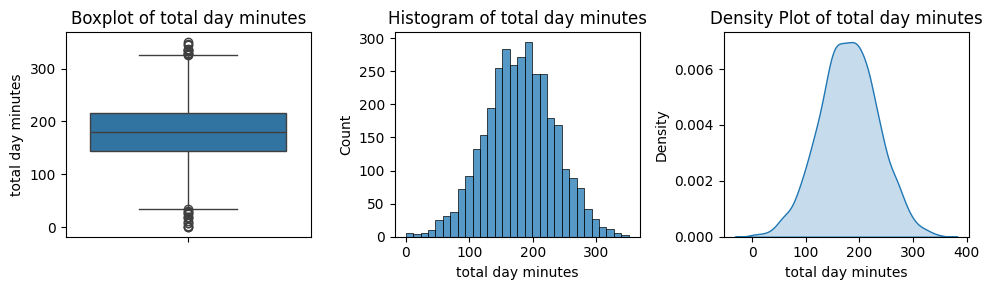

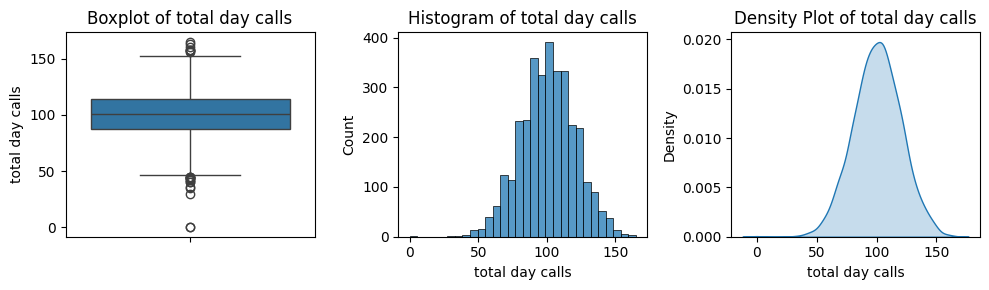

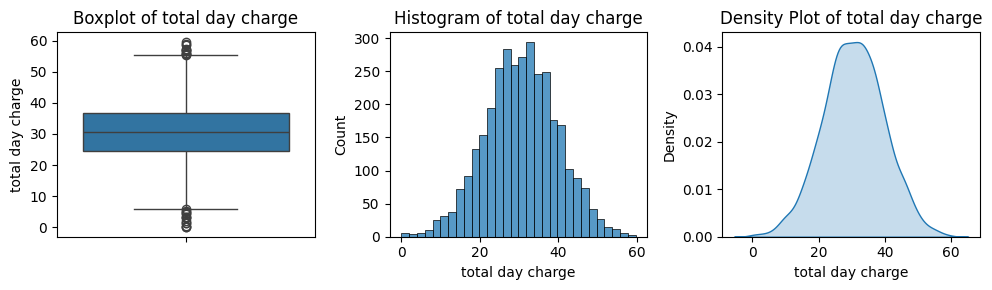

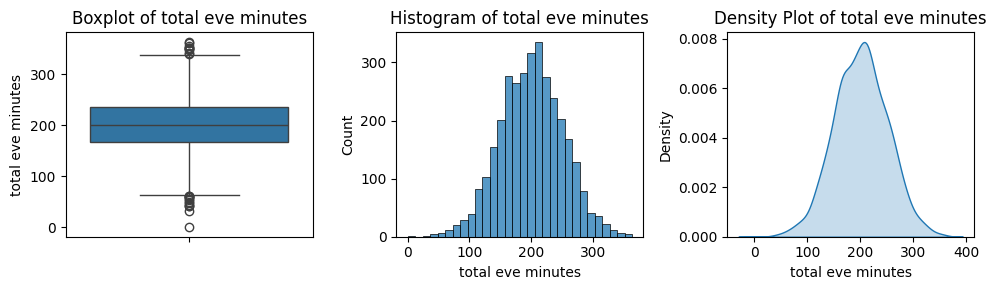

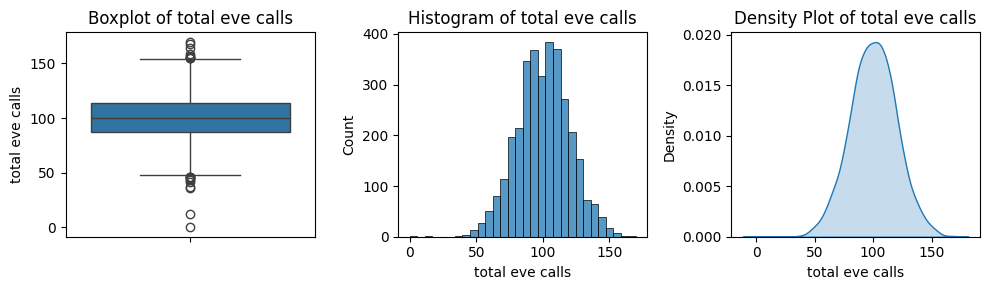

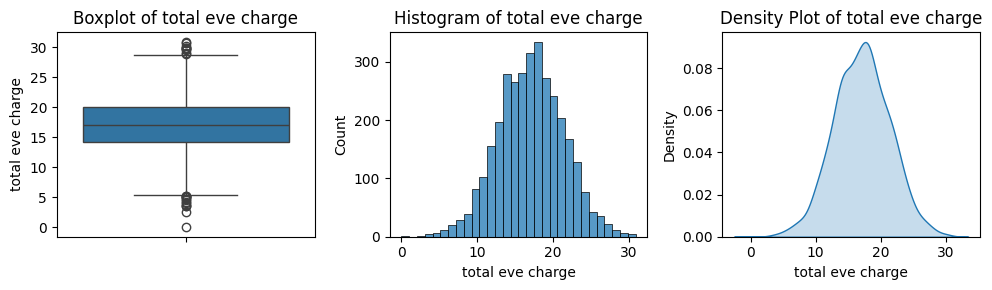

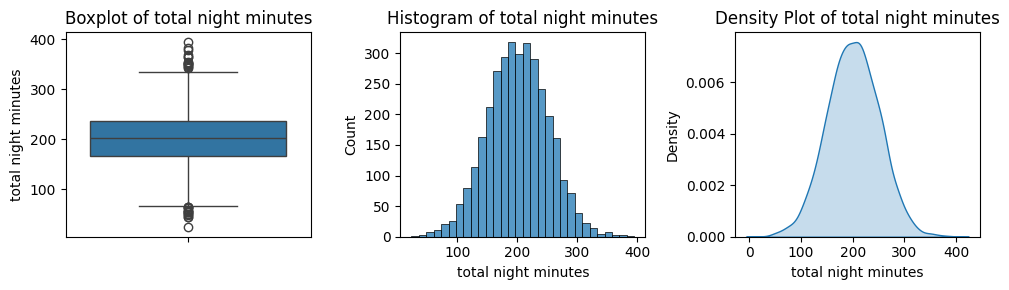

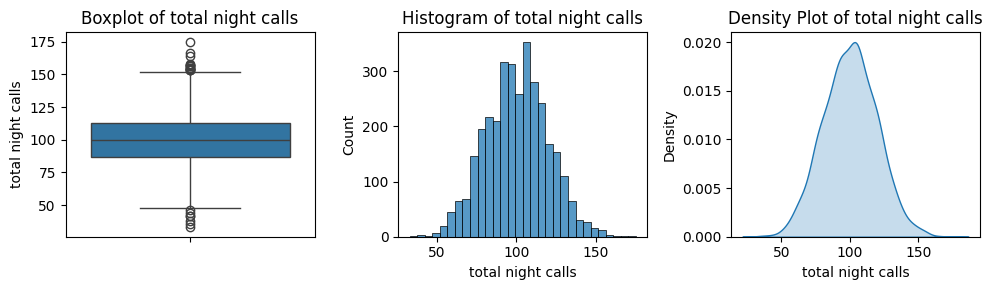

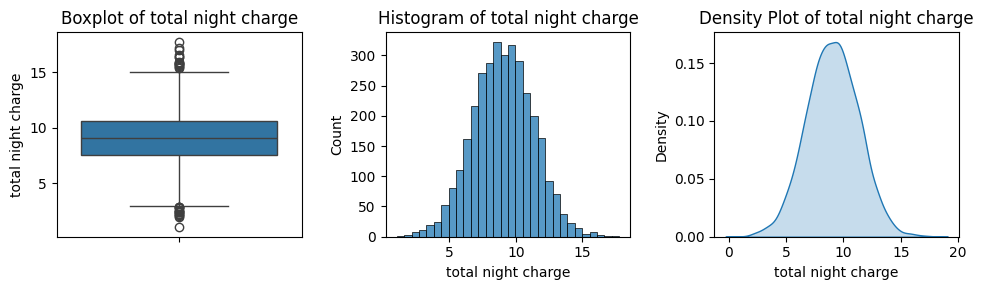

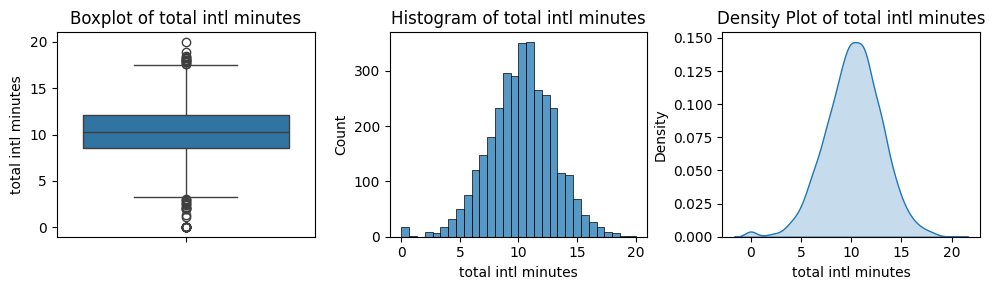

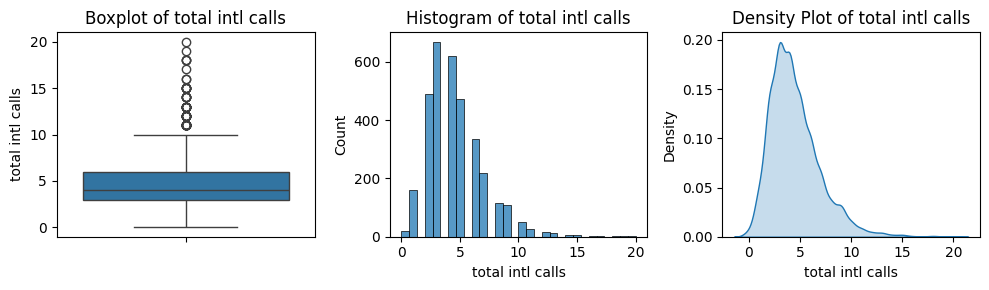

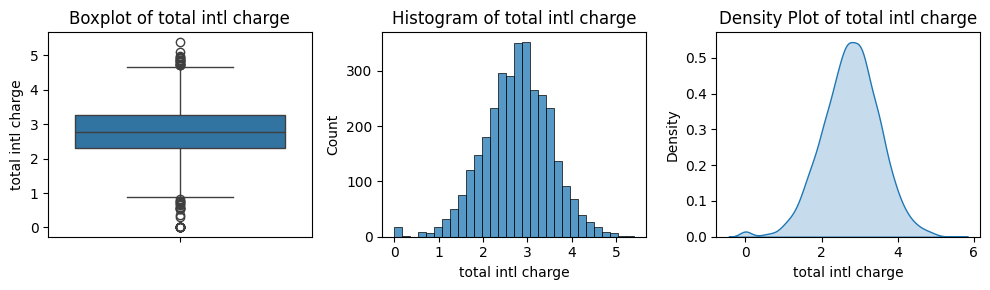

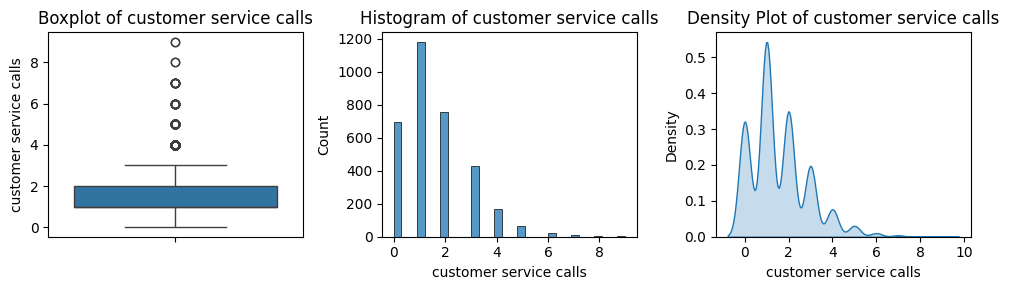

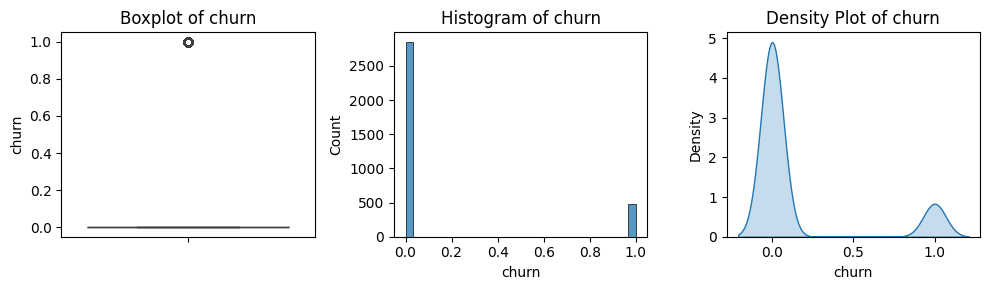

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.select_dtypes(include=['number']).columns:
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    sns.boxplot(y=df[column], ax=axes[0])
    axes[0].set_title(f'Boxplot of {column}')
    
    sns.histplot(df[column], bins=30, kde=False, ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')
    
    sns.kdeplot(df[column], fill=True, ax=axes[2])
    axes[2].set_title(f'Density Plot of {column}')
    
    plt.tight_layout()
    plt.show()

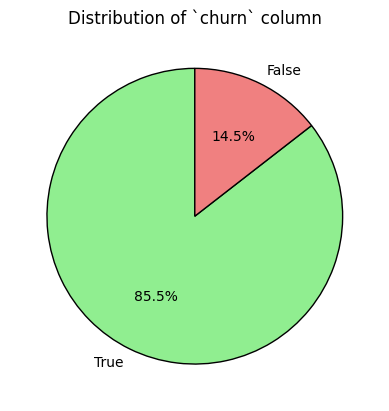

In [36]:
df["churn"].value_counts().plot.pie(
    autopct="%1.1f%%",
    labels=["True", "False"],
    colors=["lightgreen", "lightcoral"],
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

plt.ylabel("")
plt.title("Distribution of `churn` column")
plt.show()

<Axes: >

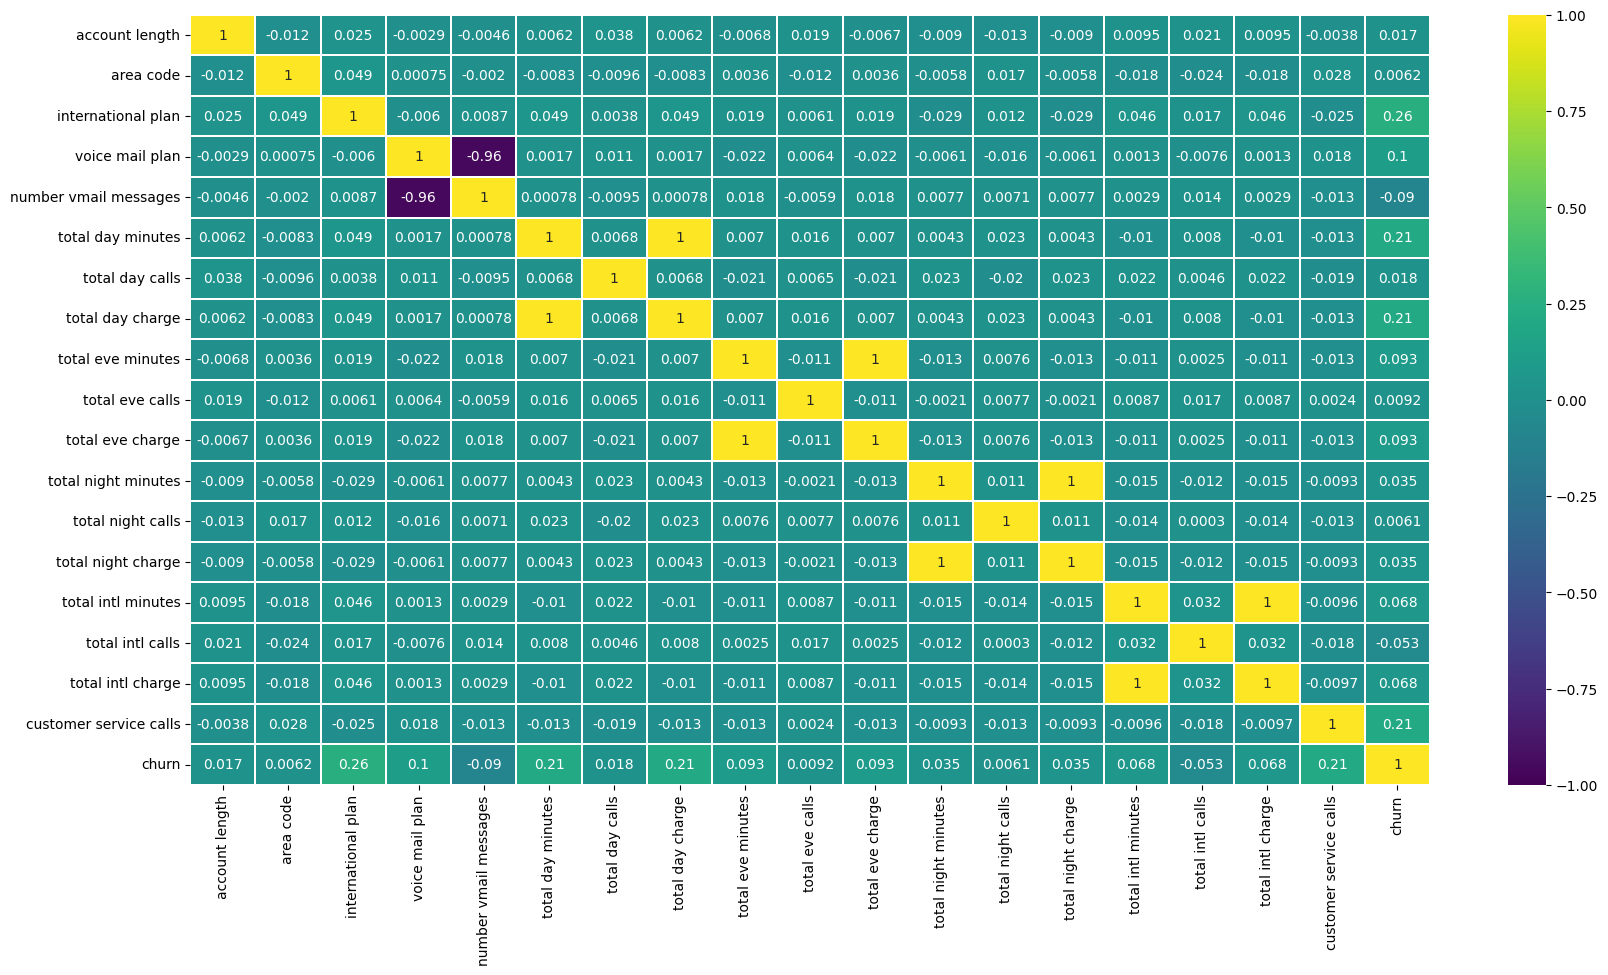

In [37]:
df_kor = df.drop(['state'], axis=1).corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

### Feature engineering

In [24]:
# due to EDA results
df = df.drop(
    ["number vmail messages",
     "total eve calls",
     "total eve minutes",
     "total day calls",
     "total day minutes",
     "total night calls",
     "total night minutes",
     "total intl calls",
     "total intl minutes"],
     axis=1
)

In [25]:
print(f"Unique values:\n------\n{df.nunique()}")

Unique values:
------
state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
total day charge          1667
total eve charge          1440
total night charge         933
total intl charge          162
customer service calls      10
churn                        2
dtype: int64


state -> Binary Encoding | Index Encoding | Remove | Target Encoding + Bins

area code -> OHE

total day charge, total eve charge, total night charge, total intl charge -> bins

In [26]:
BINS_NUMBER = 5
df['total day charge'] = pd.qcut(df['total day charge'], q=BINS_NUMBER)
df['total eve charge'] = pd.qcut(df['total eve charge'], q=BINS_NUMBER)
df['total night charge'] = pd.qcut(df['total night charge'], q=BINS_NUMBER)
df['total intl charge'] = pd.qcut(df['total intl charge'], q=BINS_NUMBER)

df = pd.get_dummies(
    df,
    columns=[
        'total day charge',
        'total eve charge',
        'total night charge',
        'total intl charge',
        'area code'
    ]
).astype("int")

# import category_encoders as ce
# # Initialize binary encoder
# encoder = ce.BinaryEncoder(cols=['state'])
# # Transform data
# df_encoded = encoder.fit_transform(df)

In [27]:
df.head(10)

,state,account length,international plan,voice mail plan,customer service calls,churn,"total day charge_(-0.001, 22.908]","total day charge_(22.908, 28.166]","total day charge_(28.166, 32.98]","total day charge_(32.98, 38.212]",...,"total night charge_(9.63, 10.98]","total night charge_(10.98, 17.77]","total intl charge_(-0.001, 2.16]","total intl charge_(2.16, 2.62]","total intl charge_(2.62, 2.97]","total intl charge_(2.97, 3.38]","total intl charge_(3.38, 5.4]",area code_408,area code_415,area code_510
0,0,128,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,107,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,2,137,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,84,1,1,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,3,75,1,1,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
5,4,118,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
6,5,121,0,0,3,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
7,6,147,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8,7,117,0,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
9,8,141,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## 3. Compare custom models performance with existing ones on external data.

##### Split data

In [28]:
y = df["churn"]
X = df.drop(["churn"], inplace=False, axis=1)

# Split data on train and hold-out sets
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

##### Experiments

In [29]:
def run_experiment(model, X_train, y_train, X_test, y_test) -> float:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [35]:
def plot_models_performance(config: dict, title="Accuracy Comparison: Custom vs. External Models"):
    df = pd.DataFrame(config)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x="Model", y="Accuracy", hue="Type", data=df, palette=["blue", "orange"])

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    plt.title(title)
    plt.ylabel("Accuracy")
    plt.xlabel("Model Type")
    plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
    plt.legend(title="Model Type")

c:\Users\Zhenia\Desktop\Education\Master\Семестр 2\Актуальні проблеми Data Mining (Юрій Валерійович Пушкаренко)\labs\.venv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Zhenia\Desktop\Education\Master\Семестр 2\Актуальні проблеми Data Mining (Юрій Валерійович Пушкаренко)\labs\.venv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\Zhenia\Desktop\Education\Master\Семестр 2\Актуальні проблеми Data Mining (Юрій Валерійович Пушкаренко)\labs\.venv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warn

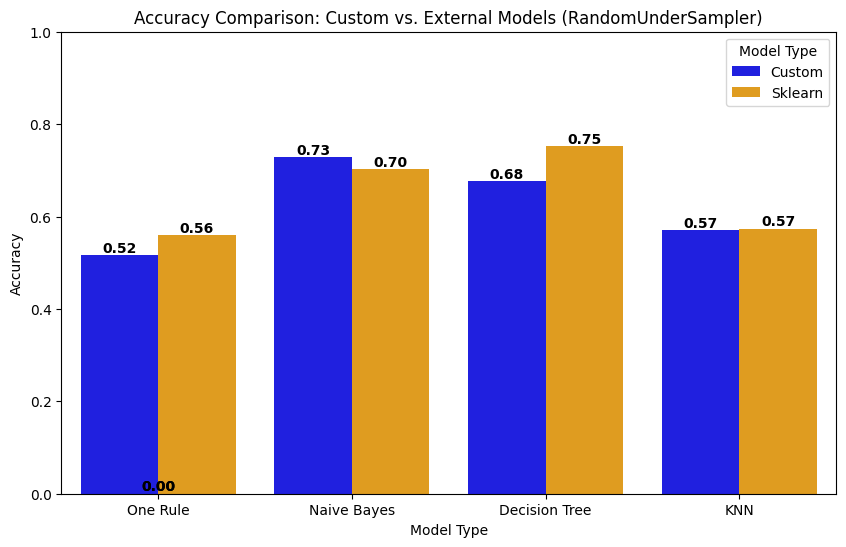

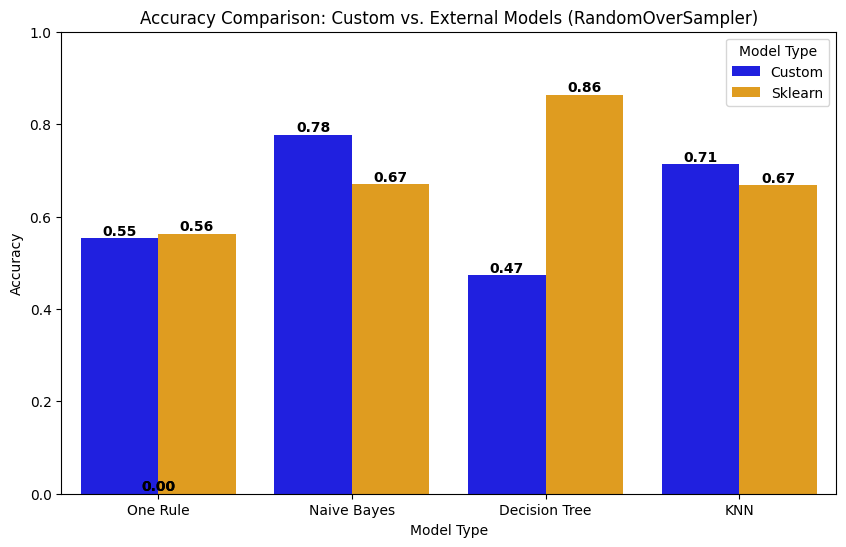

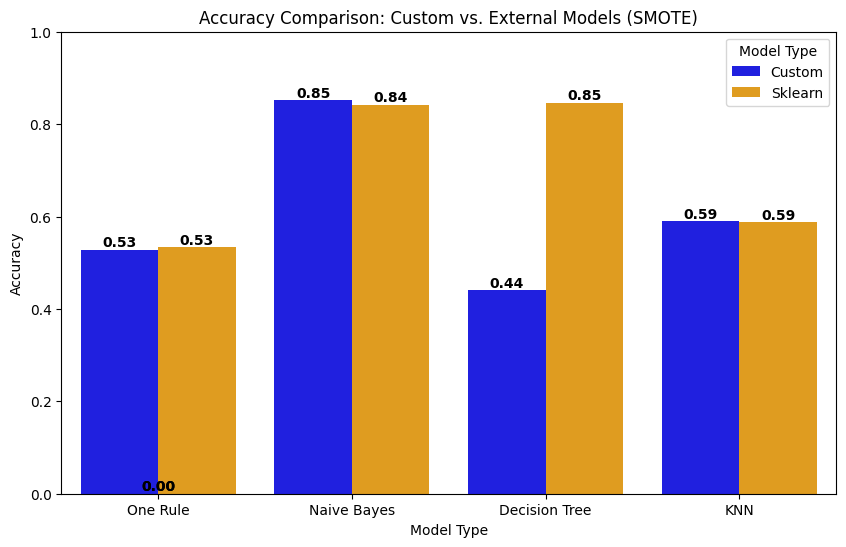

In [36]:
samplers = {
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy='auto', random_state=42),
    "RandomOverSampler": RandomOverSampler(sampling_strategy='auto', random_state=42),
    "SMOTE": SMOTE(sampling_strategy='auto', random_state=42),
}

for sampler_name, sampler in samplers.items():
    
    X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

    models = {
        "OneRuleClassifier_custom": OneRuleClassifier_custom(),
        "NaiveBayesClassifier_custom": NaiveBayesClassifier_custom(),
        "DecisionTreeClassifier_custom": DecisionTreeClassifier_custom(),
        "KNNClassifier_custom": KNNClassifier_custom(),
        "OneRClassifier": OneRClassifier(),
        "MultinomialNB": MultinomialNB(),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
    }

    accuracies = []

    for model_name, model in models.items():

        accuracy = run_experiment(
            model,
            X_train_resampled if (model_name != "OneRClassifier") else X_train_resampled.to_numpy(),
            y_train_resampled if (model_name != "OneRClassifier") else y_train_resampled.to_numpy(),
            X_holdout if (model_name != "OneRClassifier") else X_holdout.to_numpy(),
            y_holdout if (model_name != "OneRClassifier") else y_holdout.to_numpy()
        )

        accuracies.append(accuracy)
    
    accuracy_data = {
        "Model": ["One Rule", "Naive Bayes", "Decision Tree", "KNN"] * 2,
        "Type": ["Custom"] * 4 + ["Sklearn"] * 4,
        "Accuracy": accuracies
    }

    # print(pd.DataFrame(accuracy_data))

    plot_models_performance(accuracy_data, title=f"Accuracy Comparison: Custom vs. External Models ({sampler_name})")

plt.show()

#### Research

##### OneRule

In [8]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

c:\Users\Zhenia\Desktop\Education\Master\Семестр 2\Актуальні проблеми Data Mining (Юрій Валерійович Пушкаренко)\labs\.venv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Zhenia\Desktop\Education\Master\Семестр 2\Актуальні проблеми Data Mining (Юрій Валерійович Пушкаренко)\labs\.venv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [9]:
custom_onerule = OneRuleClassifier_custom()
custom_onerule.fit(X_train_resampled, y_train_resampled)
print(custom_onerule.classification_feature)
print(custom_onerule.classification_map)

account length
{1: '1', 2: '1', 11: '0', 13: '1', 15: '0', 16: '1', 17: '1', 19: '1', 21: '0', 23: '1', 24: '1', 25: '1', 27: '1', 28: '0', 29: '0', 33: '1', 34: '0', 35: '0', 36: '0', 37: '0', 38: '0', 39: '0', 40: '1', 41: '1', 42: '0', 44: '1', 45: '0', 46: '0', 47: '0', 48: '0', 49: '1', 50: '0', 51: '0', 52: '1', 53: '1', 54: '1', 55: '0', 56: '0', 57: '0', 58: '0', 59: '0', 60: '1', 61: '0', 62: '1', 63: '0', 64: '1', 65: '0', 66: '0', 67: '0', 68: '0', 69: '1', 70: '0', 71: '1', 72: '0', 73: '1', 74: '0', 75: '0', 76: '1', 77: '1', 78: '1', 79: '1', 80: '0', 81: '1', 82: '1', 83: '0', 84: '1', 85: '1', 86: '0', 87: '0', 88: '0', 89: '1', 90: '0', 91: '1', 92: '1', 93: '1', 94: '1', 95: '0', 96: '0', 97: '1', 98: '0', 99: '0', 100: '1', 101: '0', 102: '0', 103: '1', 104: '0', 105: '1', 106: '0', 107: '0', 108: '1', 109: '1', 110: '0', 111: '1', 112: '1', 113: '1', 114: '0', 115: '0', 116: '0', 117: '1', 118: '1', 119: '1', 120: '0', 121: '0', 122: '0', 123: '0', 124: '0', 125: '1

In [12]:
external_onerule = OneRClassifier()
external_onerule.fit(X_train_resampled.to_numpy(), y_train_resampled.to_numpy())
print(X_train_resampled.columns[external_onerule.feature_idx_])
print(external_onerule.prediction_dict_)

account length
{'total error': np.int64(221), 'rules (value: class)': {np.int64(1): np.int64(1), np.int64(2): np.int64(1), np.int64(11): np.int64(0), np.int64(13): np.int64(1), np.int64(15): np.int64(0), np.int64(16): np.int64(1), np.int64(17): np.int64(1), np.int64(19): np.int64(1), np.int64(21): np.int64(0), np.int64(23): np.int64(1), np.int64(24): np.int64(1), np.int64(25): np.int64(1), np.int64(27): np.int64(1), np.int64(28): np.int64(0), np.int64(29): np.int64(0), np.int64(33): np.int64(1), np.int64(34): np.int64(0), np.int64(35): np.int64(0), np.int64(36): np.int64(0), np.int64(37): np.int64(0), np.int64(38): np.int64(0), np.int64(39): np.int64(0), np.int64(40): np.int64(1), np.int64(41): np.int64(1), np.int64(42): np.int64(0), np.int64(44): np.int64(1), np.int64(45): np.int64(0), np.int64(46): np.int64(0), np.int64(47): np.int64(0), np.int64(48): np.int64(0), np.int64(49): np.int64(1), np.int64(50): np.int64(0), np.int64(51): np.int64(0), np.int64(52): np.int64(1), np.int64(53):

Difference reasons:
* Different handling of unseen feature values.
* Different numerical features discretization.
---

##### Naive Bayes

Difference reasons:
* My model determines the number of unique feature values across all features, rather than per feature. This may cause stronger smoothing than necessary, which can slightly improve generalization.
* Handling of Missing (manually assign it a small probability VS assign the smallest possible probability using log smoothing)
---

##### Decision Tree

Difference reasons:
* Splitting criteria (Information Gain VS Gini)
* My model assumes categorical features and does not handle continuous values. VS sklearn supports continuous features using threshold-based splits (X[feature] <= threshold).
* My model selects the branch with the largest training sample when a feature value is missing VS sklearn can impute missing values or handle them in probabilistic ways.
---

##### KNN

Difference reasons:
* Handling of k Nearest Neighbors (self._y_train.iloc[indices].mode().to_list()[-1])
---

**Best result: sklearn Decision Tree + Oversampler**